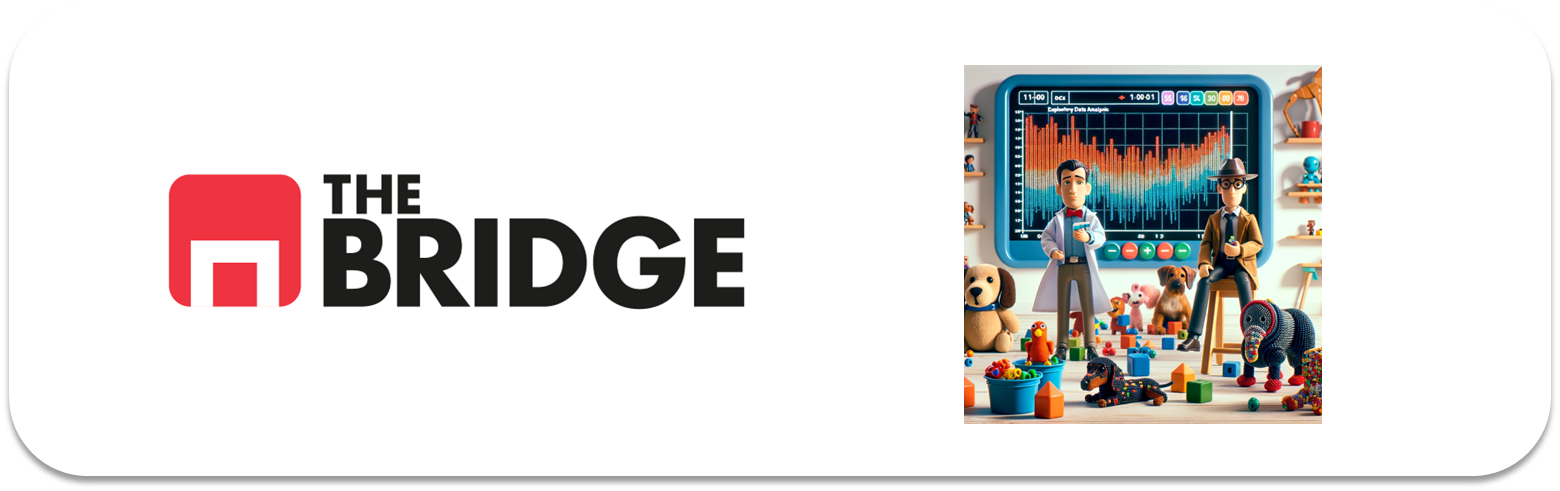

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency, pearsonr
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs,\
      pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin,\
          plot_grouped_histograms, grafico_dispersion_con_correlacion, bubble_plot


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
df_titanic.drop(columns = ["deck", "survived", "pclass", "embarked"], inplace = True)

In [5]:
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [6]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]

In [7]:
df_titanic.drop(columns = ["sibsp", "parch"], inplace = True)

In [8]:
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [9]:
df_titanic.loc[df_titanic.embark_town.isna(), "embark_town"] = df_titanic["embark_town"].mode()[0]

In [13]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [10]:
# Separo en grupos de mujer, hombre y niño para transfomar los nulos en 'age' dependiendo de su género y grupo de edad.
df_woman = df_titanic[df_titanic["who"] == "woman"] 
df_man = df_titanic[df_titanic["who"] == "man"]
df_child = df_titanic[df_titanic["who"] == "child"]

df_woman.loc[df_woman["age"].isna(), "age"] = df_woman["age"].mean()
df_man.loc[df_man["age"].isna(), "age"] = df_man["age"].mean()
df_child.loc[df_child["age"].isna(), "age"] = df_child["age"].mean()

In [11]:
df_titanic = pd.concat([df_woman, df_man, df_child]) # Concateno los tres grupos en el DF original

In [16]:
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2
11,female,58.0,26.5500,First,woman,False,Southampton,yes,True,0


In [34]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 875
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 64.4+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

------------
*--En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?--*

In [30]:
# Primero tipifico todas las variables
# Creo una función rescatada esta de la que hice en el ejercicio introduztorio

def cardinalidad(df_in, umbral_categoria, umbral_continua):
    # Creo un DataFrame para almacenar los resultados
    df_tipificacion = pd.DataFrame({
        'Card': df_in.nunique(),  # Cardinalidad
        '%_Card': df_in.nunique() / len(df_in) * 100,  # Porcentaje de cardinalidad
        'Tipo': df_in.dtypes  # Tipo de dato
    })
    

    # Inicializo la columna de clasificación como vacía
    df_tipificacion["Clasificación_como"] = ""
    
    # Aplico las reglas de clasificación
    for col in df_tipificacion.index:
        card = df_tipificacion.loc[col, 'Card']
        porcentaje = df_tipificacion.loc[col, '%_Card']
                
        if card == 2:
            df_tipificacion.at[col, "Clasificación_como"] = "Binaria" #Método 'at' accede a una celda específica
        elif card < umbral_categoria:
            df_tipificacion.at[col, "Clasificación_como"] = "Categórica"
        else:
            if porcentaje >= umbral_continua:
                df_tipificacion.at[col, "Clasificación_como"] = "Numérica Continua"
            else:
                df_tipificacion.at[col, "Clasificación_como"] = "Numérica Discreta"
    
    return df_tipificacion

In [37]:
cardinalidad = cardinalidad(df_titanic, 10, 20) # Ajusto los umbrales analizando primero el resultado que muestre y lo comparo con sus valores. Si hace falta restablezco los umbrales si algo no cuadra.
cardinalidad

,Card,%_Card,Tipo,Clasificación_como
sex,2,0.224467,object,Binaria
age,89,9.988777,float64,Numérica Discreta
fare,248,27.833895,float64,Numérica Continua
class,3,0.336700,object,Categórica
who,3,0.336700,object,Categórica
adult_male,2,0.224467,bool,Binaria
embark_town,3,0.336700,object,Categórica
alive,2,0.224467,object,Binaria
alone,2,0.224467,bool,Binaria
family_members,9,1.010101,int64,Categórica


|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|sex|sexo de la persona que embarcó|Binaria|2|Influye en el objetivo pero nos interesa más la varivale `who`|
|age|Edad de la persona indicada|Numérica discreta|1|Demográfica|
|fare|Tarifa de la persona indicada|Numérica continua|3|Relacionado con la clase que pertenecieron|
|class|Clase donde estuvo la persona en el barco|Categórica|2|Se puede ver si está relacionado si fueron más "ricos" los que sobrevivieron o los "pobres"|
|who|Indica si es hombre, mujer o niño/a|Categórica|1|Demográfica|
|adult_male|Indica si la persona es adulta y del sexo masculino (True o False)|Binaria|3||
|embark_town|Ciudades donde se embarcó|Categórica|3|Demográfica|
|alive|Muestra si la persona ha sobrevivido o no|Binaria|1|El True representa a sí y el False a no|
|alone|Si viajó sola o no|Binaria|3||
|family_members|Número de familiares con la que viajaba la persona indicada|Categórica|3||

Para poder saber si sobrevivieron más hombres, mujeres o niños relacionaré las variables `who` (categórica) y `alive` (binaria). Por lo que será una relación bivariante


In [19]:
# Calcularé las frecuencias absolutas y relativas de cada variable
f_absoluta = df_titanic["who"].value_counts()
print("Frecuencia absoluta de", f_absoluta)

f_absoluta1 = df_titanic["alive"].value_counts()
print("\nFrecuencia absoluta de", f_absoluta1)

Frecuencia absoluta de who
man      537
woman    271
child     83
Name: count, dtype: int64

Frecuencia absoluta de alive
no     549
yes    342
Name: count, dtype: int64


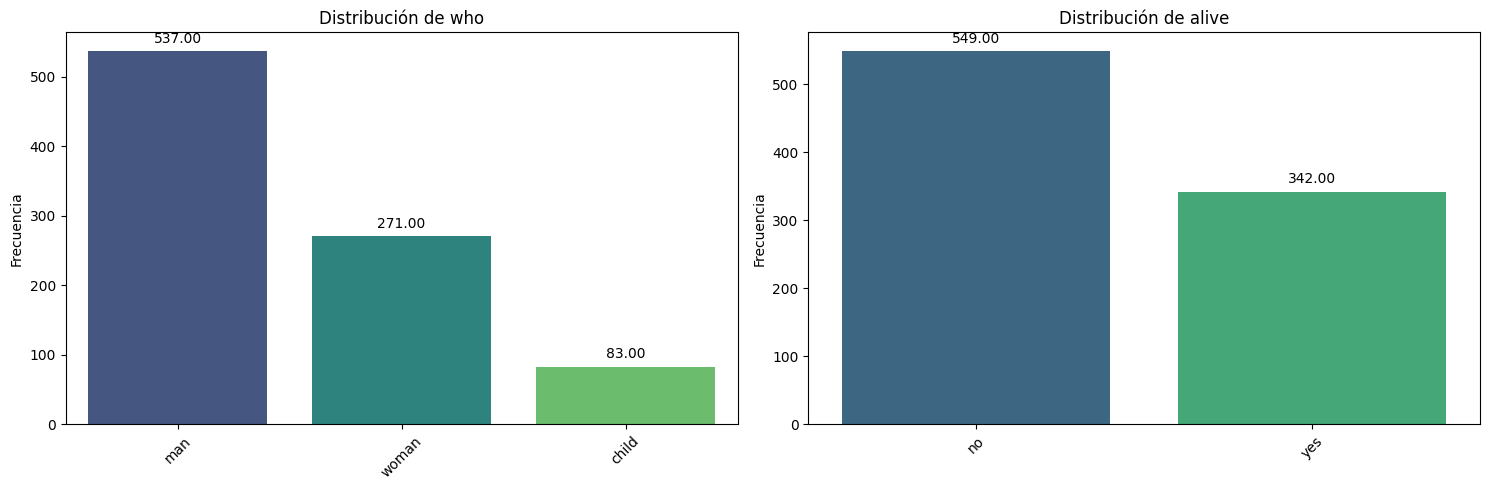

In [18]:
# Analizo a partir de la visualización gráfica
pinta_distribucion_categoricas(df_titanic, ["who", "alive"], mostrar_valores = True)

- En `who` se observa una alta cantidad de hombre con respecto a las mujeres y de mujeres con respecto a los niños/as.
- En `alive` se puede apreciar que murieron más personas de las que sobrevivieron.

In [21]:
# Imprimo por pantalla la frecuencia relativa
f_relativa = df_titanic["who"].value_counts() / len(df_titanic) * 100
print("Frecuencia relativa de", f_relativa)

f_relativa1 = df_titanic["alive"].value_counts() / len(df_titanic) * 100
print("\nFrecuencia relativa de", f_relativa1)

Frecuencia relativa de who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64

Frecuencia relativa de alive
no     61.616162
yes    38.383838
Name: count, dtype: float64


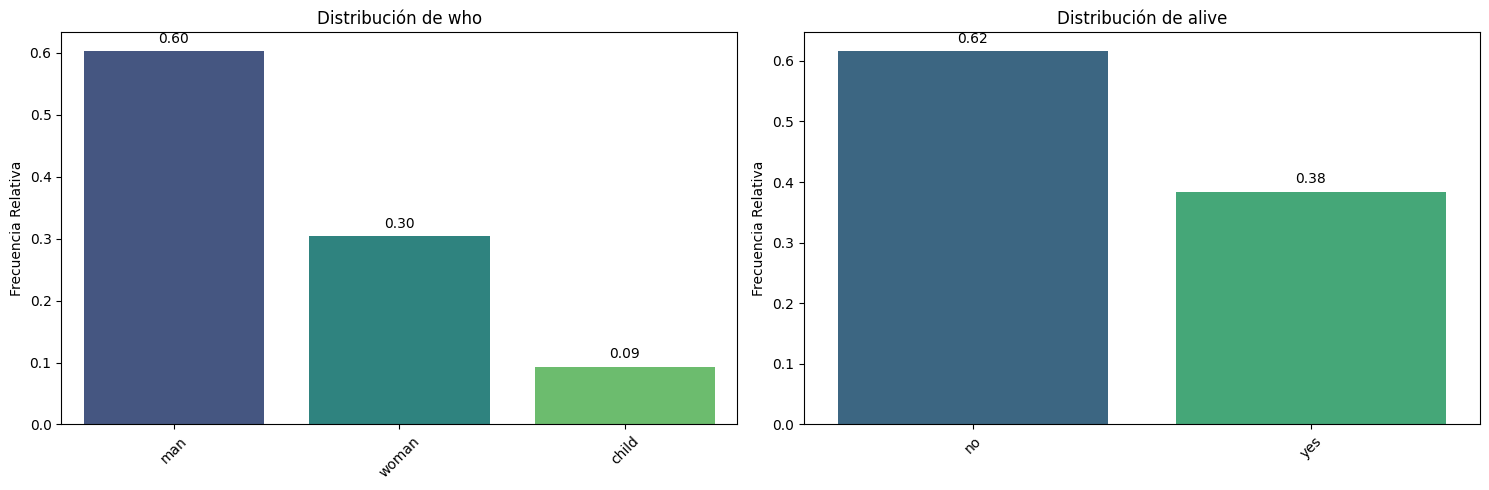

In [22]:
# Pinto su visualización
pinta_distribucion_categoricas(df_titanic, ["who", "alive"], relativa = True, mostrar_valores = True)

Aquí podemos observar el mismo análisis que con la frecuencia absoluta pero en términos porcentual.

Es decir, más del 50% de los que viajaban eran hombres y más del 50% murieron. Pero, ¿tiene alguna relación la cantidad de hombres con la cantidad de muertes?


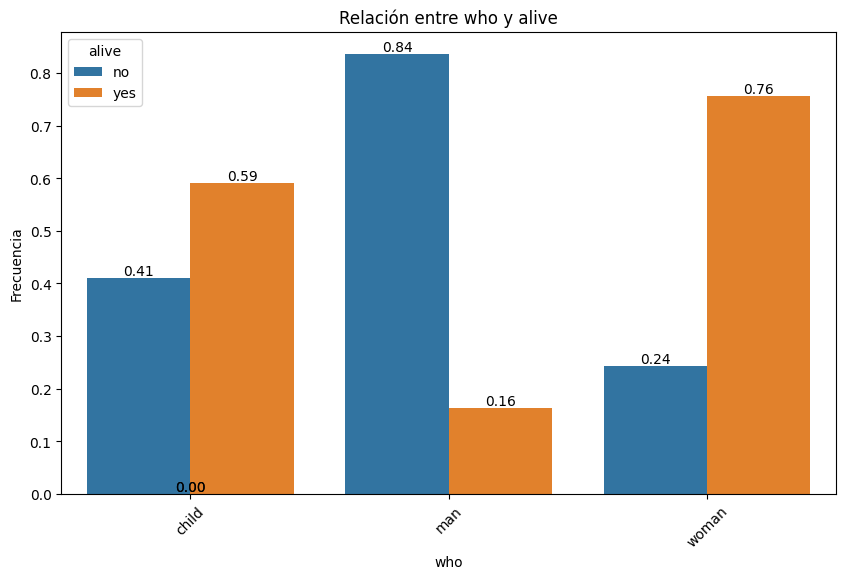

In [29]:
# Comparo ambas variables
# Lo aplico directamente mediante la frecuencia relativa
plot_categorical_relationship_fin(df_titanic, "who","alive", relative_freq = True, show_values= True)

*Análisis: --En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?--*

- Se puede apreciar que el porcentaje de muertes en hombres fue mucho mayor con respecto a las mujeres y los niños. Es más, cuando se estaba analizando de manera individual, se apreció que embarcaron más mujeres que niños, y en este caso, murieron más niños que mujeres. En estos dos últimos, sobrevieron más que murieron.

- Es importante destacar que el protocolo de emergencia a la hora de desalojar el barco en los botes salvavidas, priorizaban salvaguadar a las mujeres y a los niños. Puede ser una gran causa del reflejo de esta gráfica.

- Con respecto si había diferencia entre ser adulto y niño, mi respuesta es sí, respuesta subjetiva, ya que los niños gestionan peor estas situaciones de emergencia, se pueden perder o caer al vacío sin que su adulto de referencia se de cuenta.

------
--*En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?*--

Primero echaré un vistazo a mi tabla descriptiva y categorizada.

Una vez revisada, decido comparar las variables, `alive` (target) y `class`. (Análisis bivariante categórica)


In [31]:
# Calcularé las frecuencias absolutas y relativas de cada variable
f_absoluta = df_titanic["class"].value_counts()
print("Frecuencia absoluta de", f_absoluta)

f_absoluta1 = df_titanic["alive"].value_counts()
print("\nFrecuencia absoluta de", f_absoluta1)

Frecuencia absoluta de class
Third     491
First     216
Second    184
Name: count, dtype: int64

Frecuencia absoluta de alive
no     549
yes    342
Name: count, dtype: int64


In [33]:
# Imprimo por pantalla la frecuencia relativa
f_relativa = df_titanic["class"].value_counts() / len(df_titanic) * 100
print("Frecuencia relativa de", f_relativa)

f_relativa1 = df_titanic["alive"].value_counts() / len(df_titanic) * 100
print("\nFrecuencia relativa de", f_relativa1)

Frecuencia relativa de class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64

Frecuencia relativa de alive
no     61.616162
yes    38.383838
Name: count, dtype: float64


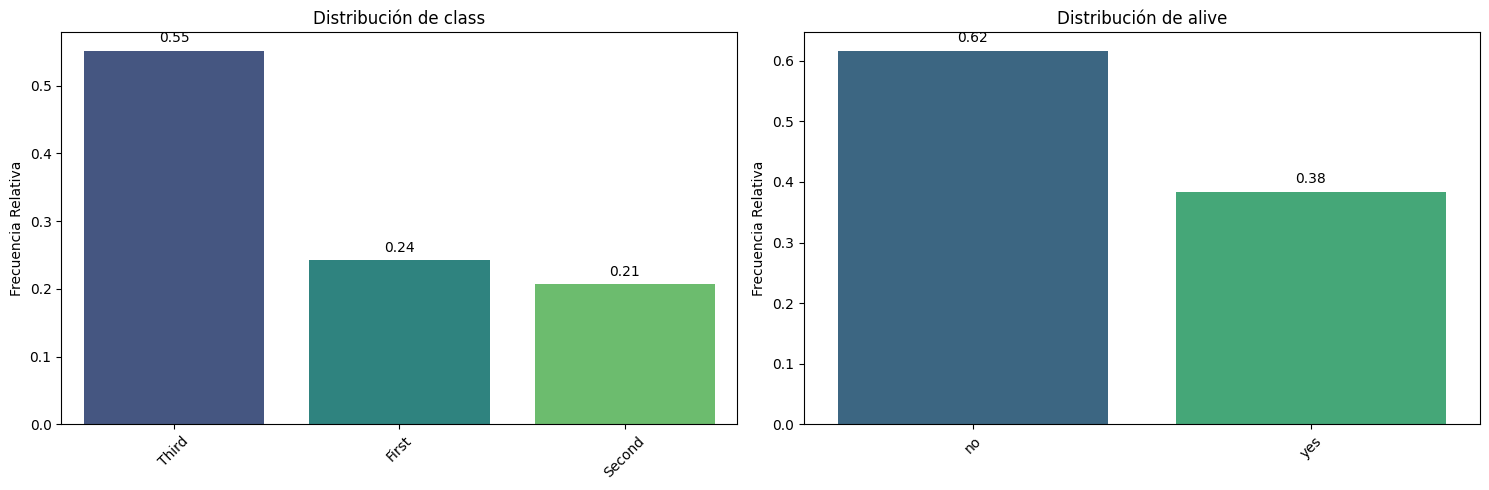

In [35]:
# Analizo a partir de la visualización relativa gráfica
pinta_distribucion_categoricas(df_titanic, ["class", "alive"], relativa = True, mostrar_valores = True)

- En `class` Se observa que hay un contraste alto entre la tercera clase con la primera y la segunda. Hubo un alto procentaje de personas que pertenecían a la tercera clase, en especial, la mitad.

- ¿Podemos relacionar que murieron más gente de la tercera clase?

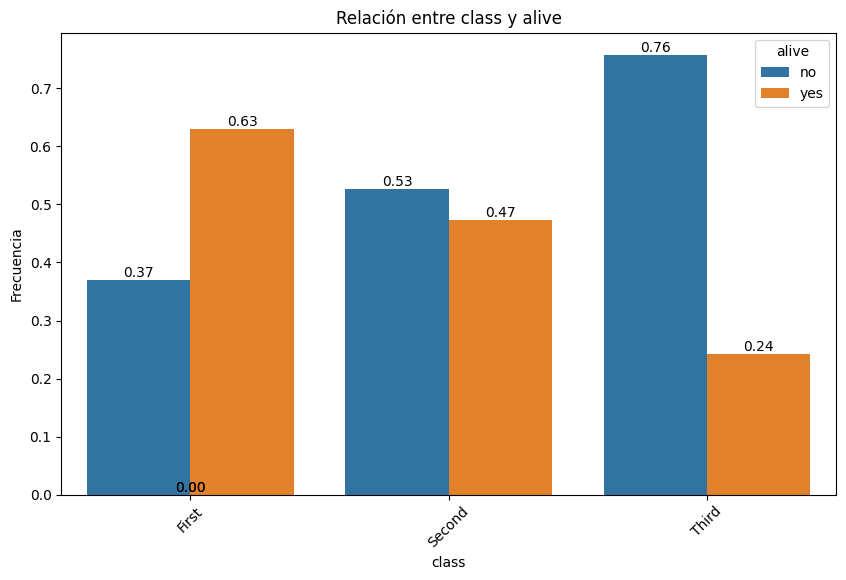

In [36]:
# Comparo ambas variables
# Lo aplico directamente mediante la frecuencia relativa
plot_categorical_relationship_fin(df_titanic, "class","alive", relative_freq = True, show_values= True)

*Análisis: --En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?*--

- En esta gráfica, se puede observa una clara relación estadísticamente significativa entre la clase en la que se viajan y la supervivencia.

- Muerieron casi el 80% de las personas que viajaban en la tercera clase, comparado con la primera clase, que sobrevivieron más de la mitad de las personas. Podemos entrar en asuntos de clasismos, donde se priorizaba a la primera clase respecto a la tercera. O podemos suponer que podrían recibir algún tipo de soborno.

- Con respecto a la segunda clase, es equivalente el número de personas que murieron de las que sobrevivieron. Lo realmente interesante está entre la primera y la tercera clase.

------
*--¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?--*

Realizaremos, de nuevo, una relación bivariante categórica entre la varible `alive` y `embark_town`

In [38]:
# Calcularé las frecuencias absolutas y relativas de cada variable
f_absoluta = df_titanic["embark_town"].value_counts()
print("Frecuencia absoluta de", f_absoluta)

f_absoluta1 = df_titanic["alive"].value_counts()
print("\nFrecuencia absoluta de", f_absoluta1)

Frecuencia absoluta de embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

Frecuencia absoluta de alive
no     549
yes    342
Name: count, dtype: int64


In [39]:
# Imprimo por pantalla la frecuencia relativa
f_relativa = df_titanic["embark_town"].value_counts() / len(df_titanic) * 100
print("Frecuencia relativa de", f_relativa)

f_relativa1 = df_titanic["alive"].value_counts() / len(df_titanic) * 100
print("\nFrecuencia relativa de", f_relativa1)

Frecuencia relativa de embark_town
Southampton    72.502806
Cherbourg      18.855219
Queenstown      8.641975
Name: count, dtype: float64

Frecuencia relativa de alive
no     61.616162
yes    38.383838
Name: count, dtype: float64


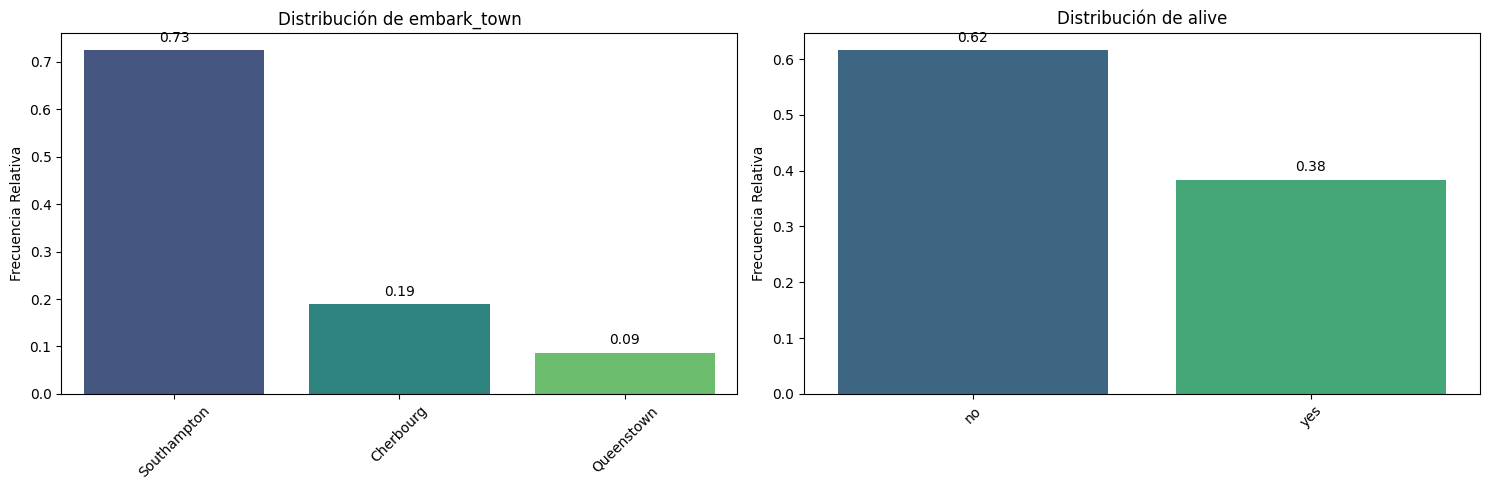

In [40]:
# Analizo a partir de la visualización relativa gráfica
pinta_distribucion_categoricas(df_titanic, ["embark_town", "alive"], relativa = True, mostrar_valores = True)

- En `embark_town`, se puede observar que mucho más de la mitad de los pasajeron embarcaron el Southampton. Sin haberlo investigado, podría ser el puerto principal. En cambio, en Queenstown embarcaron el 10%.

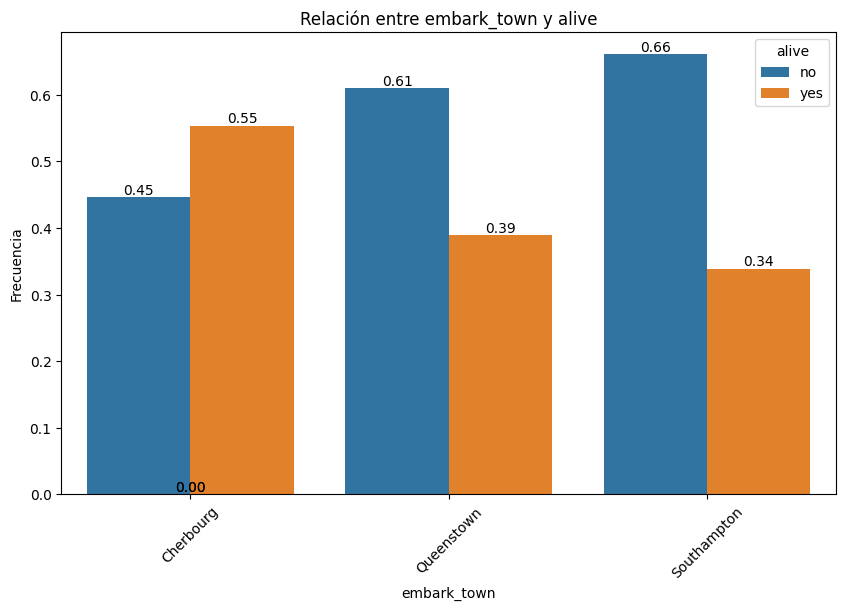

In [41]:
# Comparo ambas variables
# Lo aplico directamente mediante la frecuencia relativa
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", relative_freq = True, show_values= True)

*Análisis: --¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?*--

Hay algo muy interesante en esta comparación.

- A pesar de haber embarcado el 10% de pasajeros en Queenstown, murieron más de la mitad de las personas que lo hicieron.

- Como era de esperar, Southampton tenía más probabilidades de tener un alto porcentaje de fallecidos ya que era dónde más embarcaron.

- Hay que destacar que en Cherbourg sobreviveron más personas con un porcentaje bajo también de embarques.

- Podemos realizar hipótesis como: ¿qué barrio es más rico y más pobre? ¿Puede estar relacionado con los fallecimientos dependiendo de si era rico o pobre?

Tras la última hipótesis, decido realizar un análisis multivariante de categóricas entre: `alive`, `embark_town` y `class`

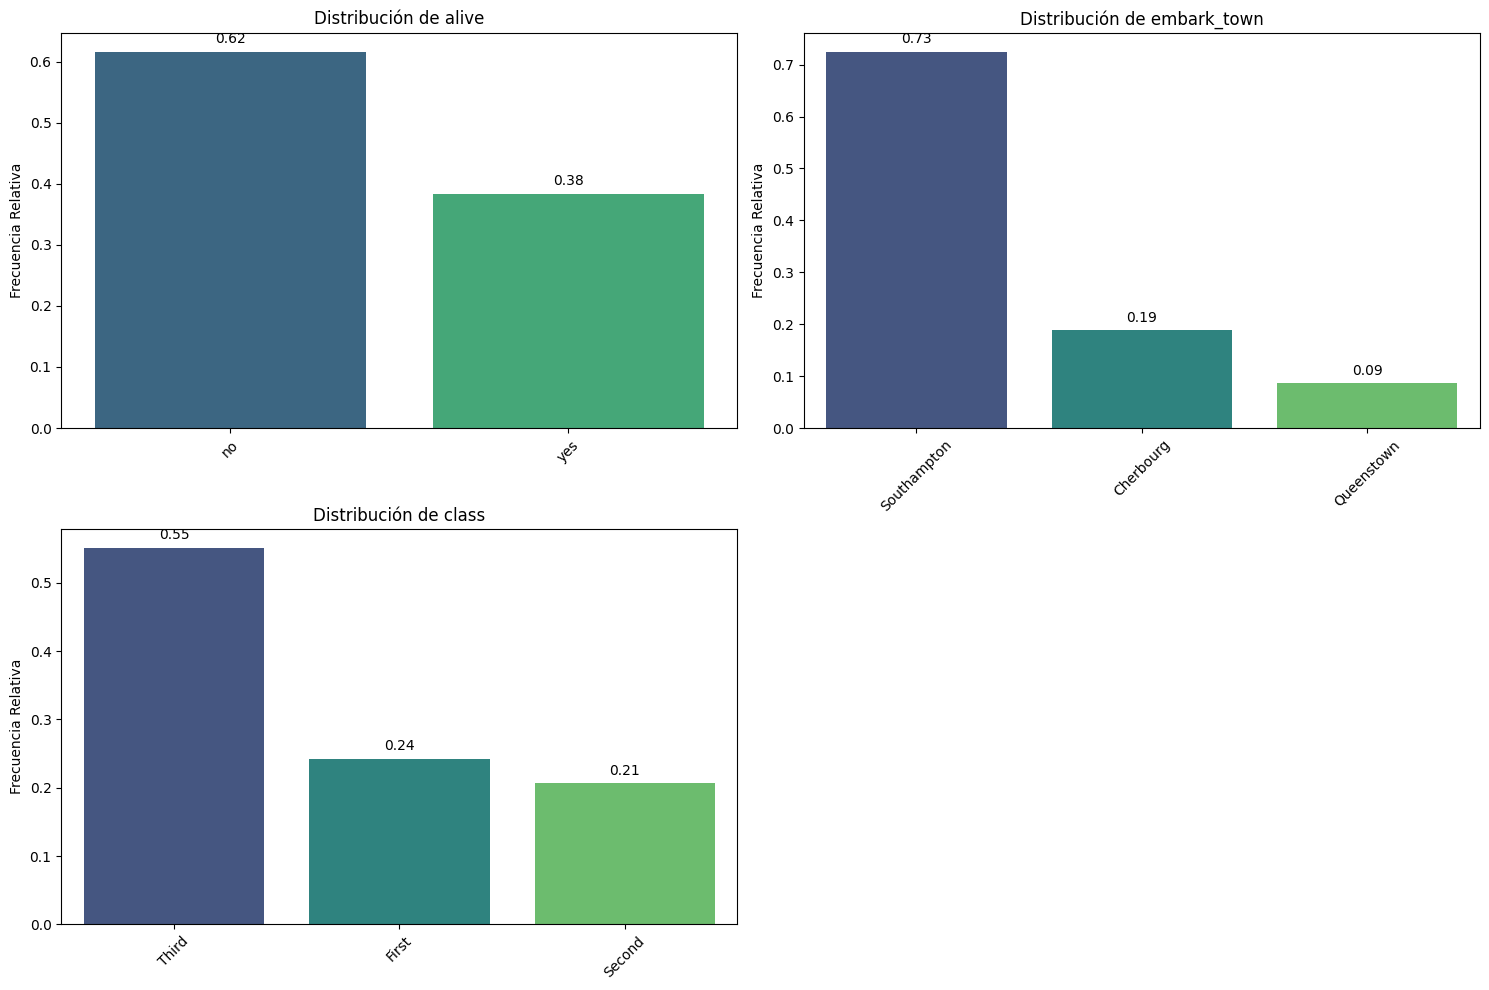

In [45]:
# Pinto todos los valores iniciales en su forma relativa
pinta_distribucion_categoricas(df_titanic,["alive","embark_town","class"], relativa= True, mostrar_valores= True)

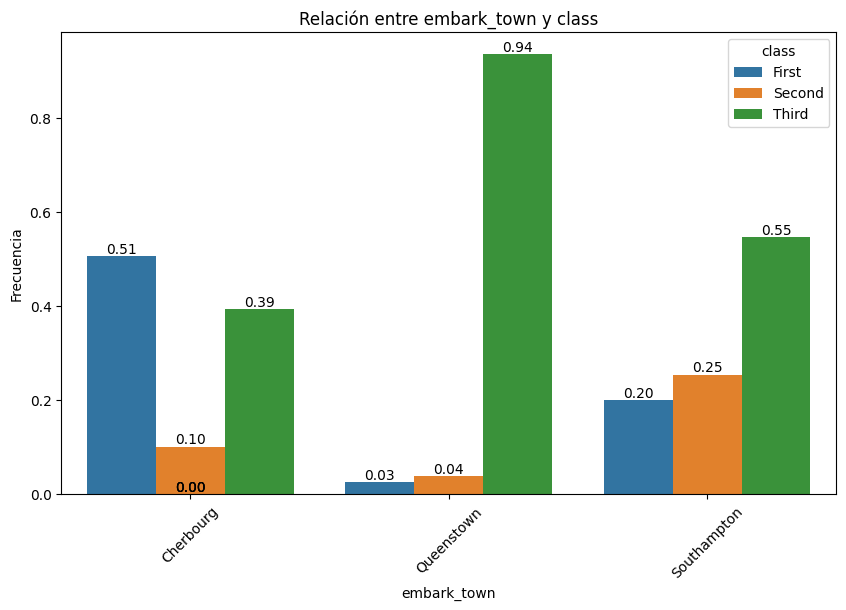

In [46]:
# Analizo de manera bivariante 'class' y 'embark_town' ya que las otras dos parejas entre 'alive' están realizadas
plot_categorical_relationship_fin(df_titanic,"embark_town","class", relative_freq= True, show_values= True)

Aquí ya podemos observar algo interesante, en Cherbourg embarcaron más gente de primera clase con respecto a las otras.

In [47]:
# Par apoder analizarlo mejor, divido mi datset en tantos subdatasets como valores de 'alive' tenga, ya que es mi target
columnas = ["alive","embark_town","class"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]

Respuesta no:


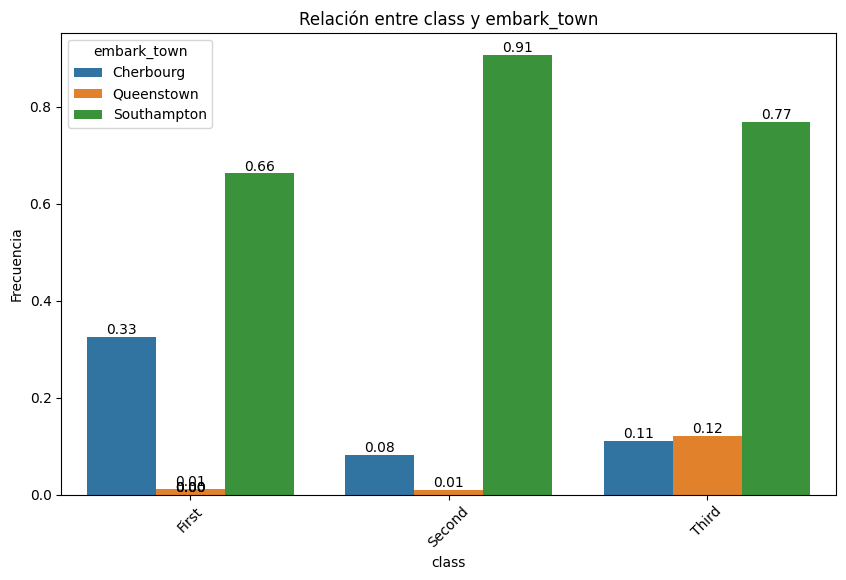

Respuesta yes:


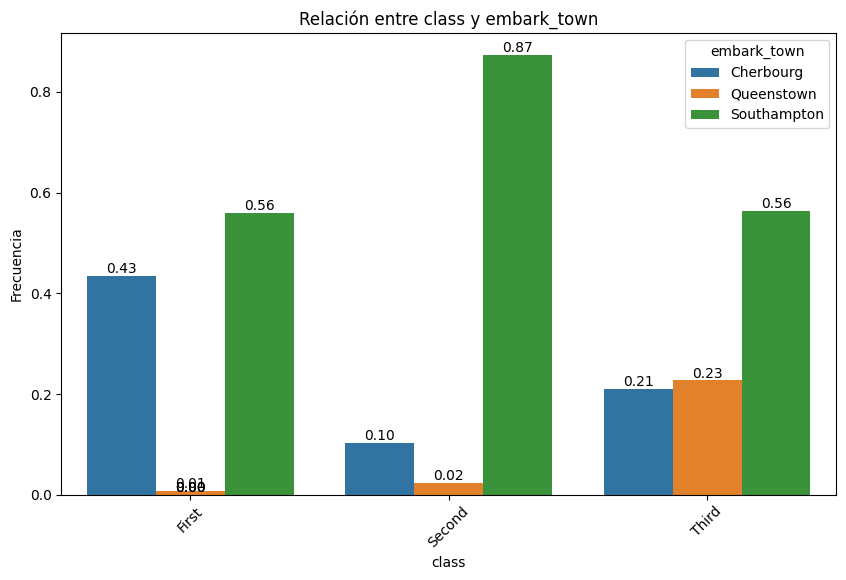

In [48]:
# Hago un análisis bivariante pata cada subdataset
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

*Segundo análisis*

Con este análisis podemos contestar a las preguntas que realizamos al finalizar el primer análisis bivariante entre `alive` y `embark_town`:

- En Cherbourg, embarcaron más personas de la primera clase deduciendo que era una ciudad con un nivel alto socioeconómico, y sobrevivieron más persona pertenencientes a este sector.

- En Queenstown, embarcaron, casi el 95%, personas de la tercera clase, demostrando que era un barrio obrero.

- En Southampton, no se observa valores extremos aunque la mitad de las personas eran de la tercera clase.


-------
*--¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?--*

Analizaremos de manera bivariante `alive` con `fare` (categórica con numérica)

In [4]:
#No analizo la relativa de 'alive' ya que lo he hecho antes.
#Pongo los datos para tenerlos más accesible
print('''Frecuencia relativa de alive
no     61.616162
yes    38.383838
''')

Frecuencia relativa de alive
no     61.616162
yes    38.383838



(2,)


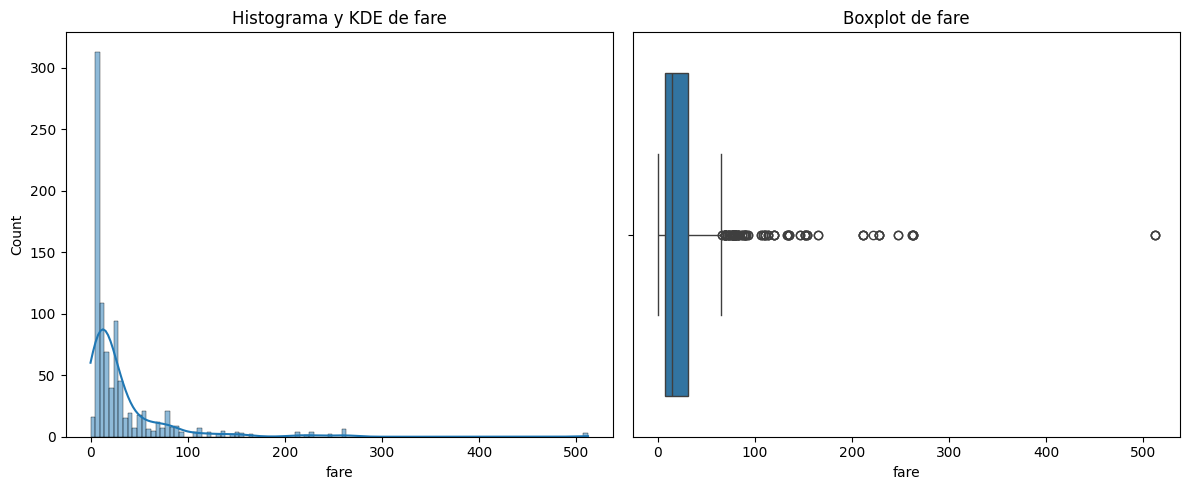

In [18]:
# Pinto el histograma y el boxplot de 'fare'
plot_combined_graphs(df_titanic,["fare"])

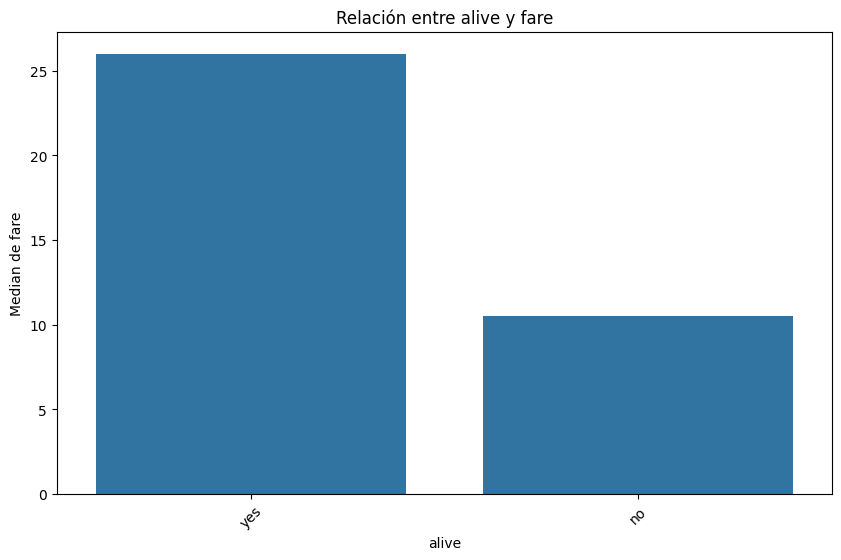

In [19]:
# Muestro diferentes medidas de la variable 'fare' en función de los valores de 'alive' como la mediana
plot_categorical_numerical_relationship(df_titanic,"alive","fare", measure = "median")

Aquí observamos una clarísima diferencia entre la gente que sí sobrevivieron, tenían una tarifa más alta que la gente que no. 

Sigamos investigando para sacar más conclusiones


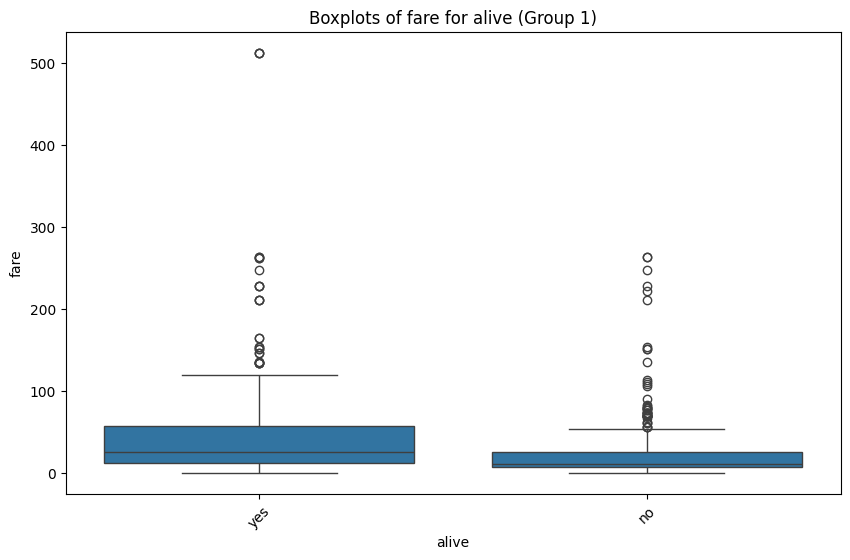

In [20]:
# Ahora lo compararemos con el diagrama de cajas (Boxplot)
plot_grouped_boxplots(df_titanic,"alive","fare")

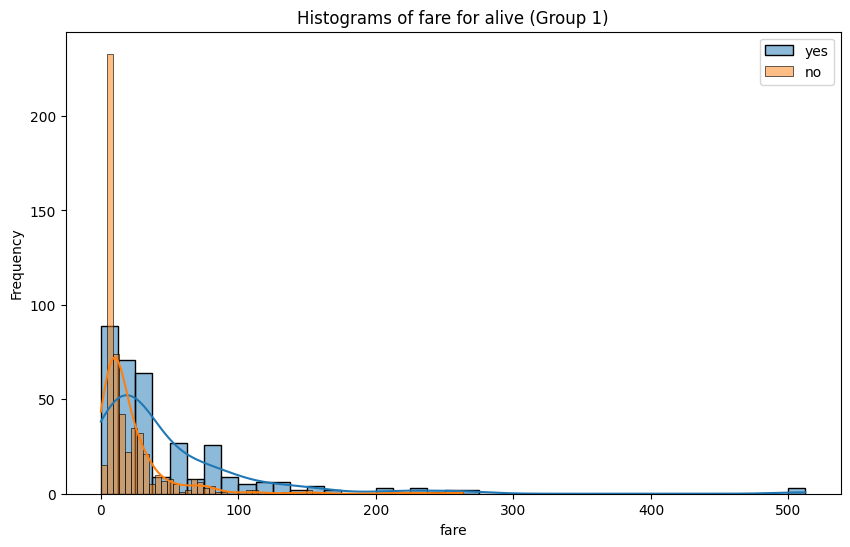

In [21]:
# Y lo complementamos con los histogramas
plot_grouped_histograms(df_titanic,"alive", "fare", 2)

*Análisis: --¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?--*

- Esta gráfica sugiere que la tarifa pagada podría haber tenido algún impacto en la probabilidad de supervivencia de los pasajeros del Titanic, posiblemente reflejando diferencias en el acceso a los recursos de emergencia y a los botes salvavidas entre las diferentes clases socioeconómicas. Como hemos visto en la comparación anterior con las clase ya que sobrevivieron más gente de primera.

---------
*--Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?--*

En primero lugar, voy a investigar la variable `fare`

In [25]:
df_titanic.fare.min() 

0.0

Calculando el mínimo de tarifa, muestra que hay valores con valor 0 por lo que sí hay gente que no pagaron billetes.

Pero, ¿cuántas?

In [28]:
df_free_fare = df_titanic.loc[df_titanic.fare == 0]
df_free_fare.fare.value_counts() 

fare
0.0    15
Name: count, dtype: int64

In [29]:
df_free_fare["class"].value_counts() # Veo a quñe clases pertenecen esas personas

class
Second    6
First     5
Third     4
Name: count, dtype: int64

In [30]:
df_free_fare.who.value_counts() # Solo hombres

who
man    15
Name: count, dtype: int64

Puedo deducir: (hipótesis)

- Las personas que pertenecen a la tercera clase y no pagaron, fue porque se colaron o lo ganaron en una apuesta como el amigo de Jack en la película.

- Las de segunda y primera clase, o les dejaron pasar gratis o parecido a la tercera clase.





In [35]:
# Veo quién es la persona que más dinero pagó
max_fare = df_titanic.fare.max()
df_max_fare = df_titanic.loc[df_titanic.fare == max_fare]

In [36]:
# Veo la clase a la que perteneció, dónde embarcó, el género y si sobrevivió
df_max_fare[["class", "embark_town", "who", "alive"]]

,class,embark_town,who,alive
258,First,Cherbourg,woman,yes
679,First,Cherbourg,man,yes
737,First,Cherbourg,man,yes


Para mi (no) sorpresa, fueron tres personas las que pagaron la tarifa más alta y las tres pertenecían a la primera clase y embarcaron el Cherbourg, coincidiendo con mis análisis anteriores

--------
*--Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.--*

Ya lo he demostrado en los análisis anteriores.

-----
*--Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?--*

Para este análisis voy a realizar una relacion multivariante entre las variables `alive`, `class` y `age`.

Dos de ellas ya lo he analizado, las dos categóricas, `alive` y `class`, donde pude observar que muerieron casi el 80% de las personas que viajaban en la tercera clase, comparado con la primera clase, que sobrevivieron más de la mitad de las personas.

Por lo que analizaré de manera bivariante `alive` con `age` y `class` con `age`

(2,)


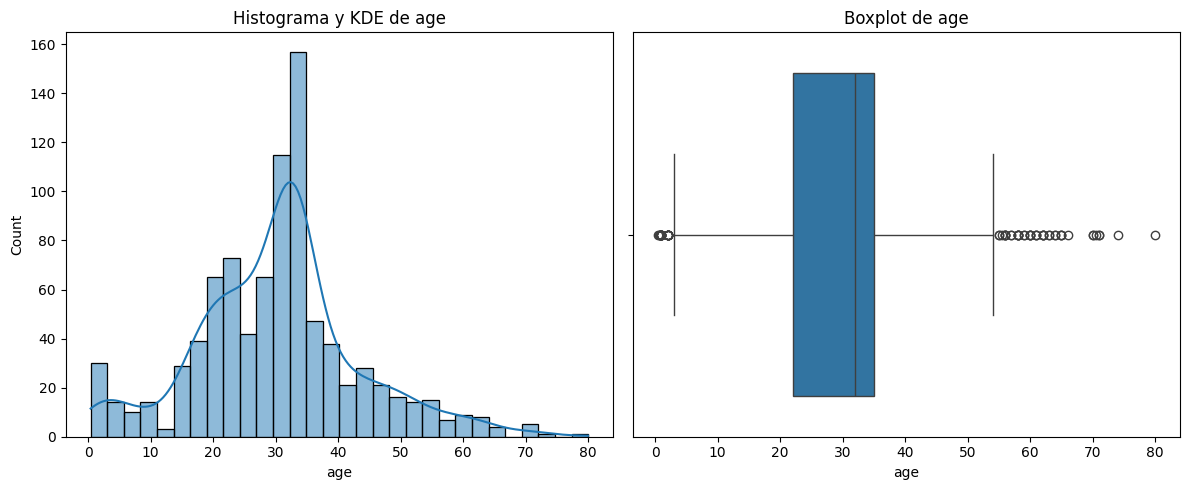

In [37]:
# Pinto el histograma y el diagrama de cajas de 'age'
plot_combined_graphs(df_titanic,["age"])

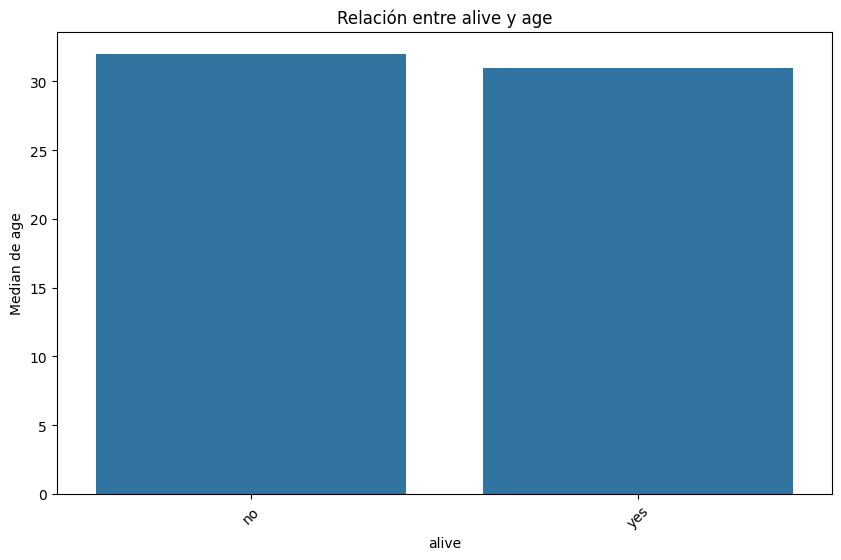

In [14]:
# Muestro diferentes medidas de 'age', como la mediana
plot_categorical_numerical_relationship(df_titanic,"alive","age", measure = "median")

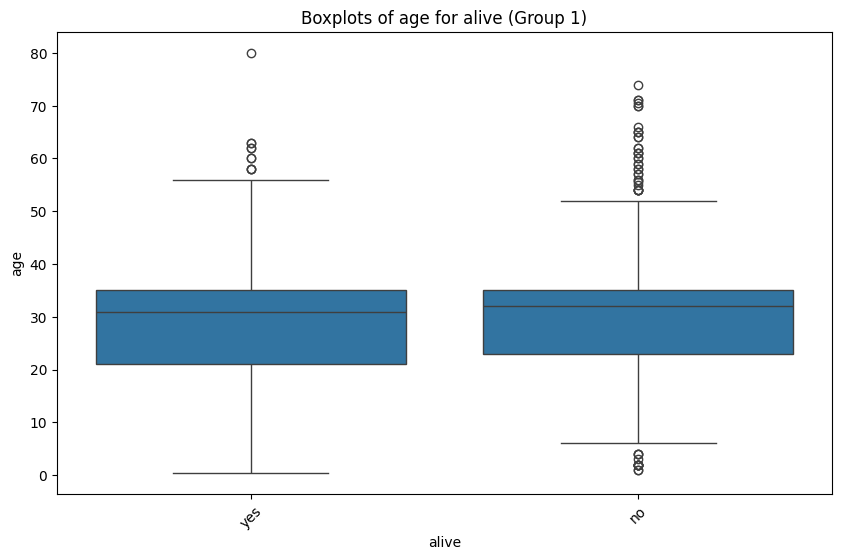

In [15]:
# Lo comparamos con el diagrama de cajas
plot_grouped_boxplots(df_titanic,"alive","age")

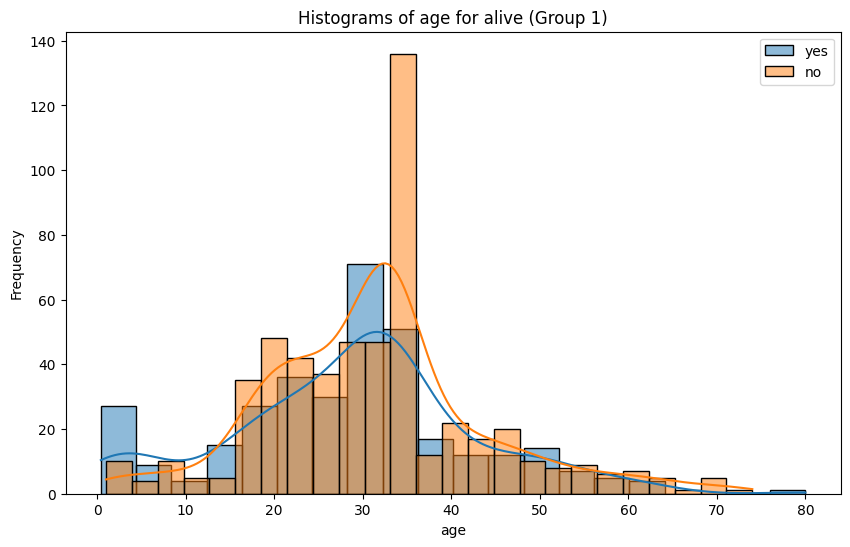

In [38]:
# Comparo 'alive' y 'age'
plot_grouped_histograms(df_titanic, cat_col="alive",num_col="age", group_size= 2)

Con las gráficas mostradas para `age` y `alive`, muestran que los datos se concentran entre los 20 y 30 tanto para los que sobrevivieron como para los que fallecieron, siendo un número más alto estos últimos.

Realizamos lo mismo para `age` y `class`

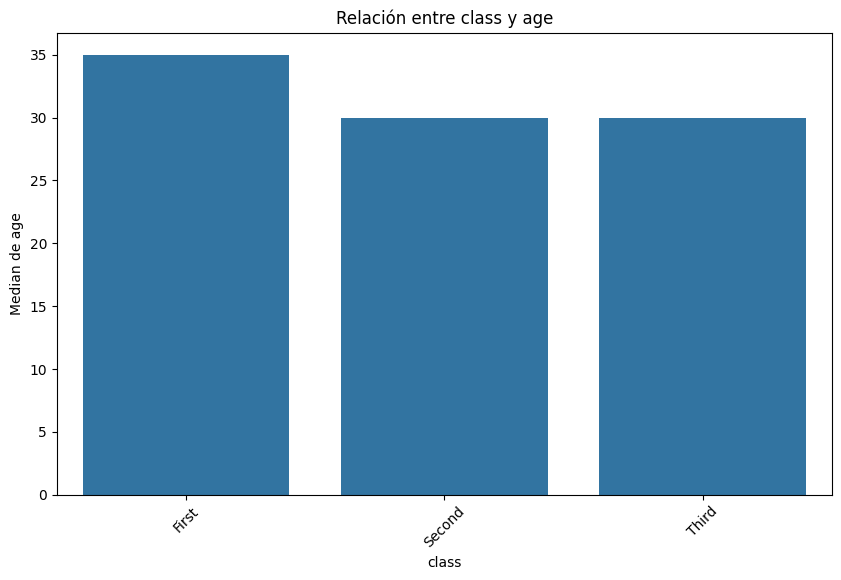

In [16]:
# Muestro diferentes medidas de 'age', como la mediana
plot_categorical_numerical_relationship(df_titanic,"class","age", measure = "median")

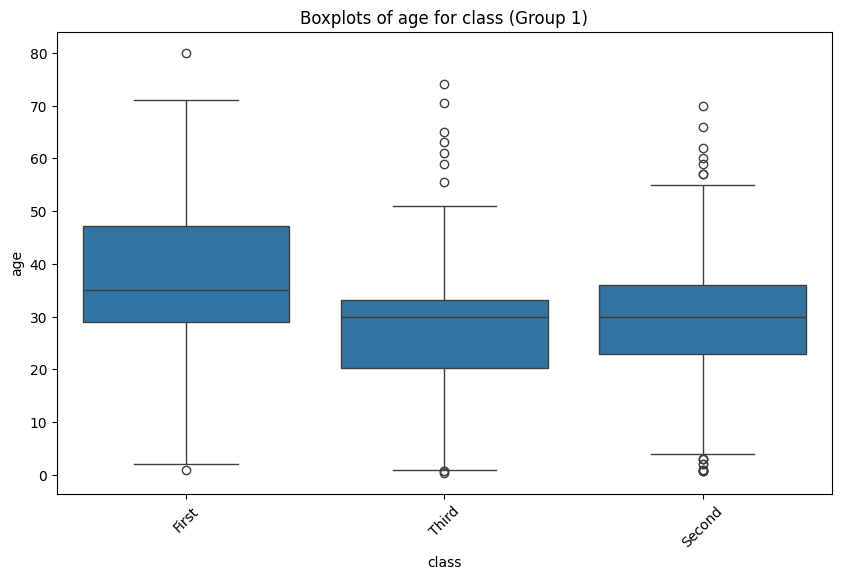

In [17]:
# Lo comparamos con el diagrama de cajas
plot_grouped_boxplots(df_titanic,"class","age")

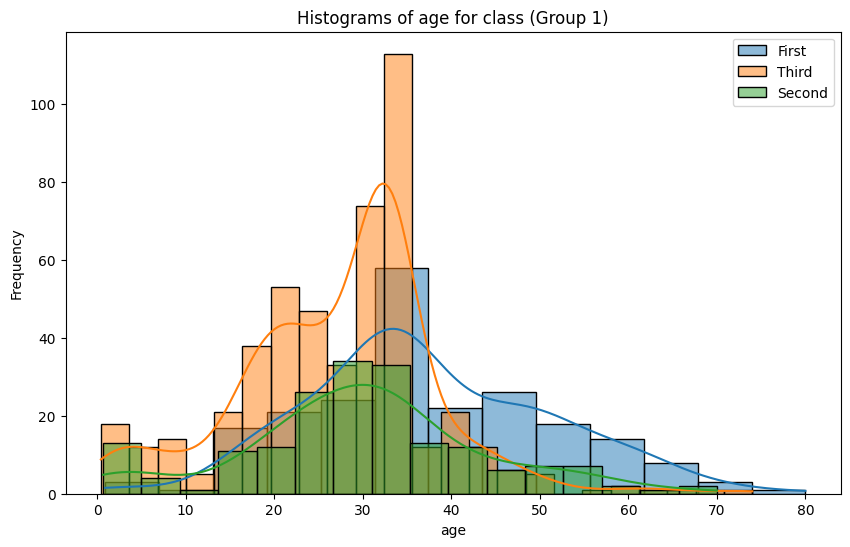

In [19]:
# Comparo 'class' y 'age'
plot_grouped_histograms(df_titanic, cat_col="class",num_col="age", group_size= 3)

*Análisis*:

- Comparando visualmente los datos recogidos de las dos comparaciones bivariantes, sobrevivieron más los grupos de la primera clase ya que los datos se concentran por encima de los 30 años

----
*--Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?--*

- He relacionado `age` con `alive` --> los datos se concentran entre los 20 y 30 tanto para los que sobrevivieron como para los que fallecieron, siendo un número más alto estos últimos.

- También he comparado `fare` con `alive` --> la tarifa pagada podría haber tenido algún impacto en la probabilidad de supervivencia de los pasajeros.

Por lo que ahora asociaré `age` con `fare` de manera bivariante numérica.


In [20]:
# Ya he analizado individualmente cada valirable. Ahora analizo el método describe() en ambas
df_titanic[["age", "fare"]].describe()

,age,fare
count,891.000000,891.000000
mean,30.319458,32.204208
std,13.063839,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,32.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


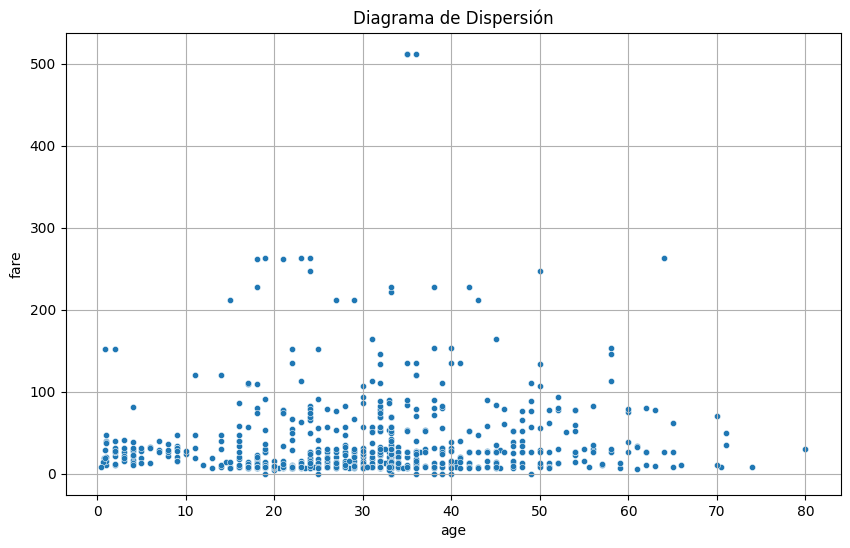

In [24]:
# Ahora los comparo con el diagrama de dispersión scattered plot

grafico_dispersion_con_correlacion(df_titanic,"age","fare", 20)

In [25]:
# Pinto su coeficiente de correlación
df_titanic[["age","fare"]].corr()

,age,fare
age,1.000000,0.080765
fare,0.080765,1.000000


In [27]:
pearsonr(df_titanic["age"], df_titanic["fare"])

PearsonRResult(statistic=0.08076504311672367, pvalue=0.015893067264095565)

*Análisis*:

- Existe una relación débil  entre la edad de los pasajeros y la tarifa que pagaron. La edad no es un factor fuerte en la determinación de la tarifa, aunque hay una leve tendencia de que los pasajeros mayores pagaron tarifas ligeramente más altas. Este resultado se alinea con la observación visual del diagrama de dispersión, donde no se aprecia una tendencia clara y fuerte, sino lineal.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [2]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

df_air_jun.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


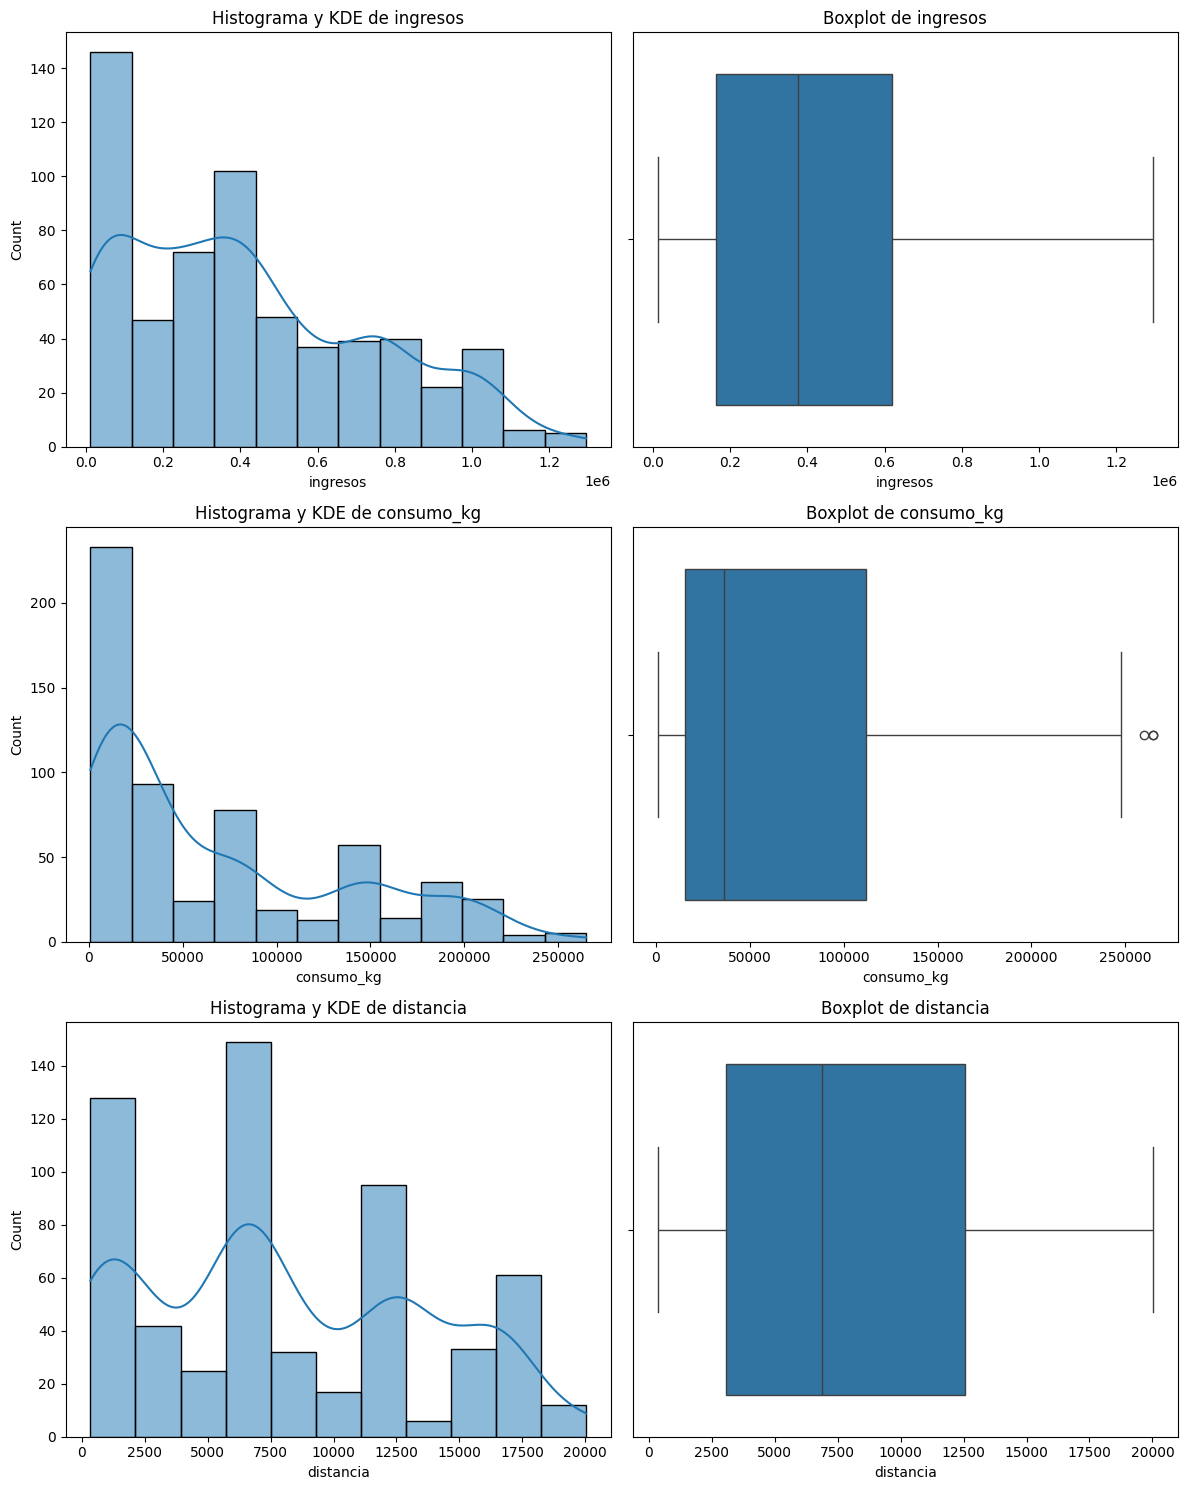

In [7]:
# Primero se muestra los valores y diagramas de cada uno así como las correlaciones dos a dos 
plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])

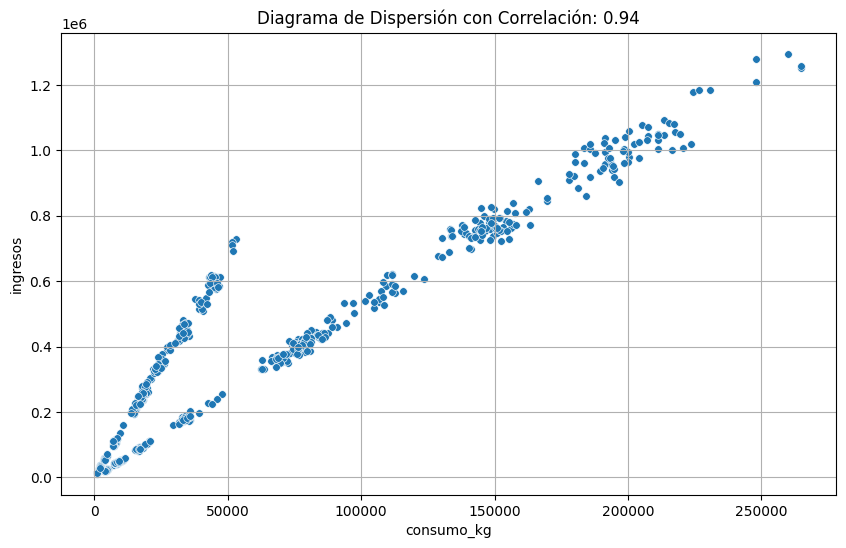

In [8]:
grafico_dispersion_con_correlacion(df_air_jun,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

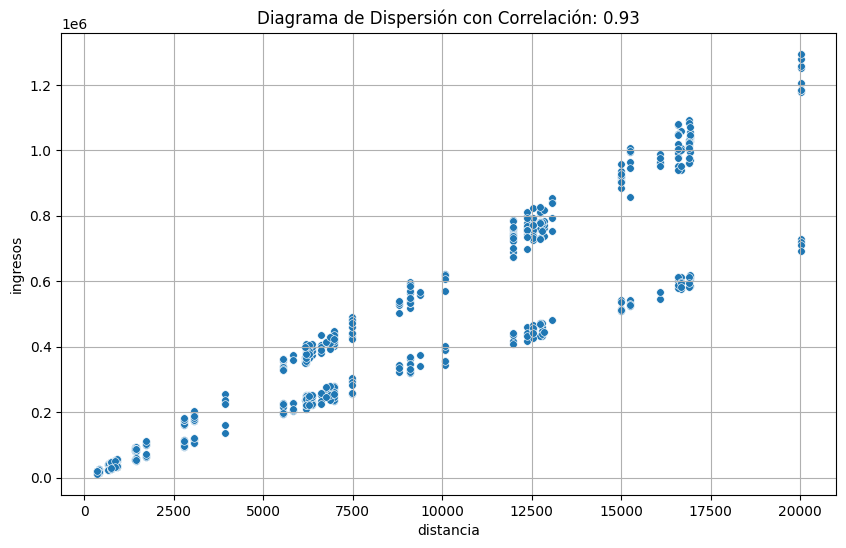

In [9]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

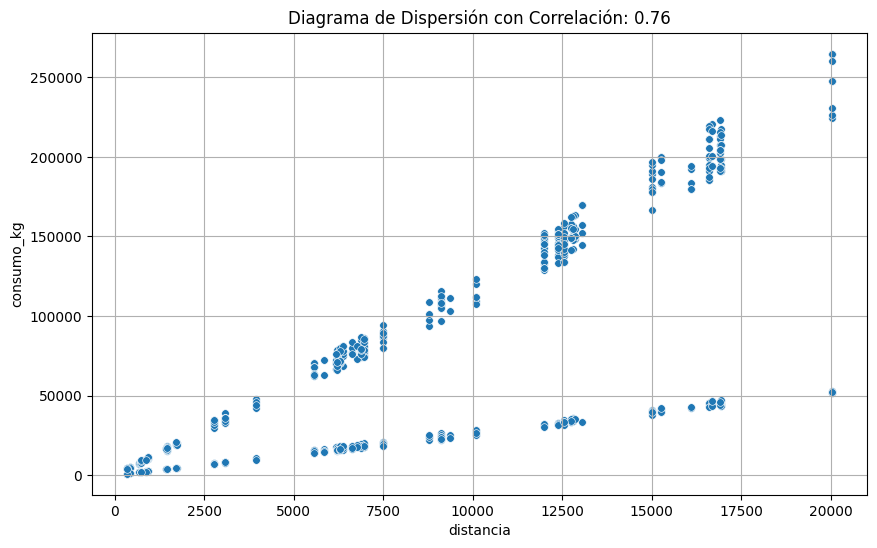

In [10]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

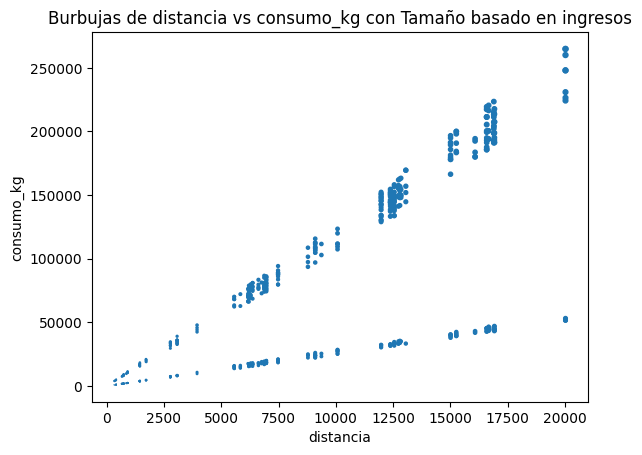

In [13]:
# Mostramos los tres valores a la vez
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

*Análisis mostrado en el ejercicio*

>"El tamaño de las burbujas depende de los ingresos, se ve la correlación entre distancia y consumo, auque claramene hay una línea de vuelos mucho más eficientes y si nos fijamos en los tamaños de las burbujas de una línea y otra son aparentemente similares. Es decir parece y esta sería una gran línea de trabajo, un conjunto de viajes que son más eficientes en todos los términos que otros."

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [33]:
# Primero voy a ver cómo es la distribución por cuartiles y el mínimo y el máximo para poder realizar los rangos de las categóricas basándome en esas cifras
df_air_jun.distancia.describe()[ ["min","25%", "50%", "75%", "max"]]

min      344.0
25%     3073.0
50%     6877.0
75%    12553.0
max    20029.0
Name: distancia, dtype: float64

In [3]:
# Observando los valores
# Crearé 4 categorías (5000, 10000, 15000, +15000)
def categorizar_vuelo(distancia):
    if distancia <= 5000:
        return "CD"
    elif distancia <= 10000:
        return "MD"
    elif distancia <= 15000:
        return "MMD"
    else:
        return "LD"

df_air_jun["cat_vuelo"] = df_air_jun["distancia"].apply(categorizar_vuelo)


In [4]:
df_air_jun[["distancia", "cat_vuelo"]]

,distancia,cat_vuelo
0,411,CD
1,12738,MMD
2,9103,MD
3,6370,MD
4,7480,MD
...,...,...
595,12553,MMD
596,1447,CD
597,9373,MD
598,13058,MMD


In [5]:
# Primero voy a mostrar los valores de 'cat_vuelo', y después las correlaciones dos a dos 
# Frecuencia absoluta
df_air_jun["cat_vuelo"].value_counts()


cat_vuelo
MD     204
CD     176
MMD    114
LD     106
Name: count, dtype: int64

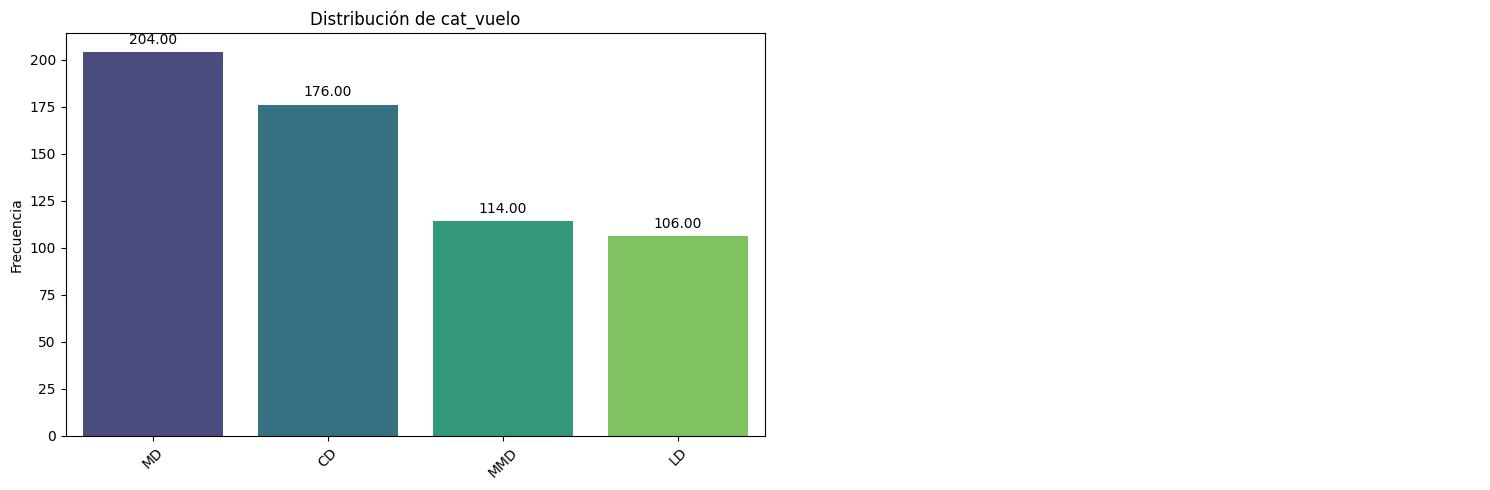

In [6]:
pinta_distribucion_categoricas(df_air_jun, ["cat_vuelo"], mostrar_valores = True)

In [7]:
# Ahora la frecuencua relativa
df_air_jun["cat_vuelo"].value_counts() / len(df_air_jun) * 100


cat_vuelo
MD     34.000000
CD     29.333333
MMD    19.000000
LD     17.666667
Name: count, dtype: float64

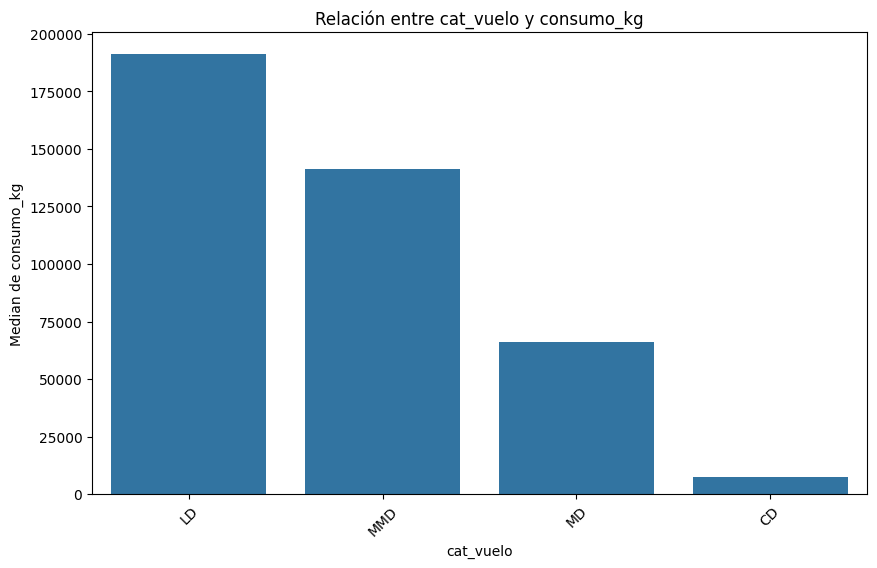

In [10]:
#Comparo la mediana en relación con 'cat_vuelos' y 'consumo_kg'
plot_categorical_numerical_relationship(df_air_jun,"cat_vuelo","consumo_kg", measure = "median")

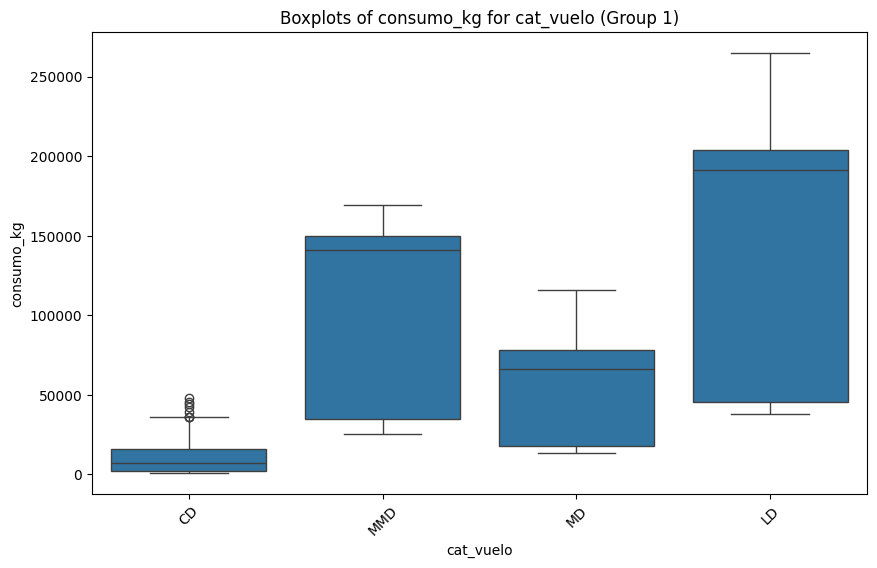

In [11]:
# Relacionamos mediante el diagrama de cajas
plot_grouped_boxplots(df_air_jun,"cat_vuelo","consumo_kg")

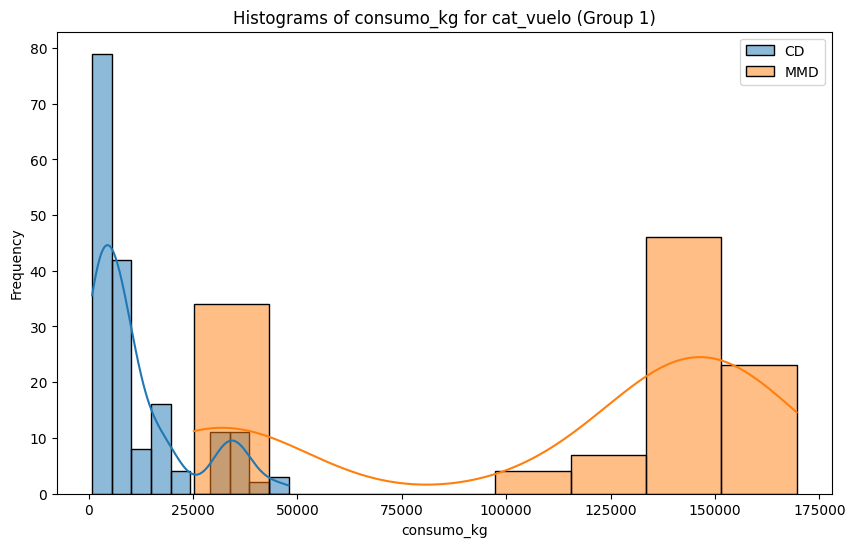

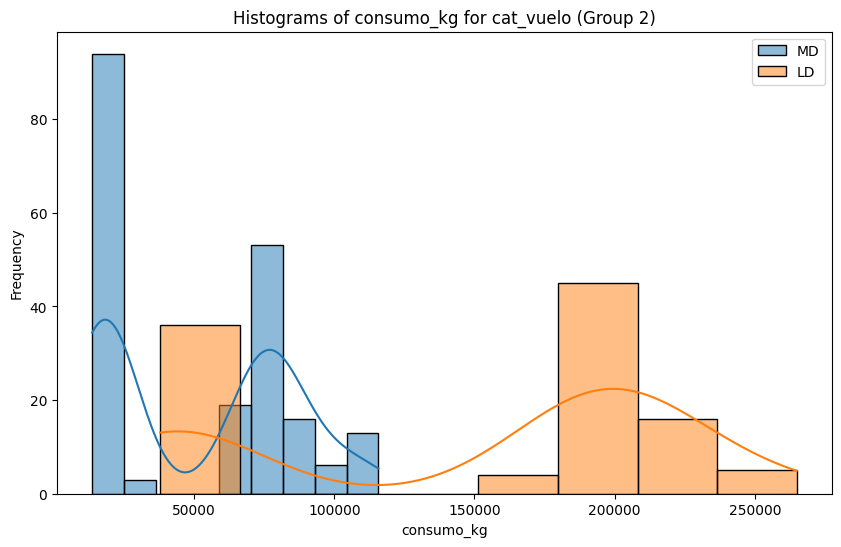

In [12]:
# Comparamos sus histogramas
plot_grouped_histograms(df_air_jun,"cat_vuelo", "consumo_kg", 2)

Aquí se puede observar que:

- Los vuelos CD (< 5000), consumen menos como es lógico concentrándose de 0 a 50000 kg de combustible.
- Los vuelos MMD (5000-10000), van subiendo hasta los 160000, aunque hay un viaje a MMD que consume mucho menos que el resto (entre 25000 y 40000). ¿Este vuelo podría ser más eficiente?
- Lo vuelos MD (10000-15000), flucutan entre los 30000 y 120000.
- Los vuelos LG consumen mucho más aunque se puede apreciar otra exepciçon donde este vuelo consime entre 40000 y 70000. Podría ser otro vuelo más eficiente que el resto

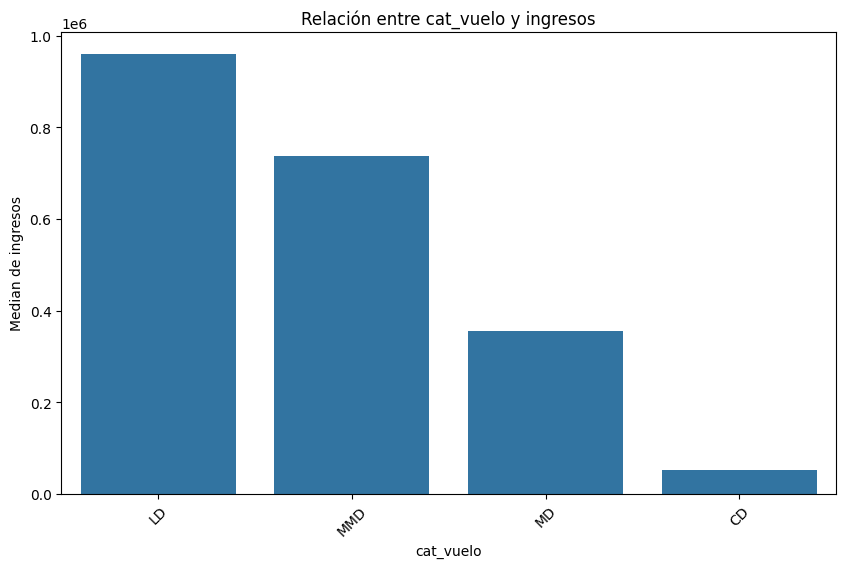

In [15]:
# Ahora realizaremos el análisis bivariante entre 'cat_vuelo' y 'ingresos'
# Comparo la mediana en relación con ambas variables
plot_categorical_numerical_relationship(df_air_jun,"cat_vuelo","ingresos", measure = "median")

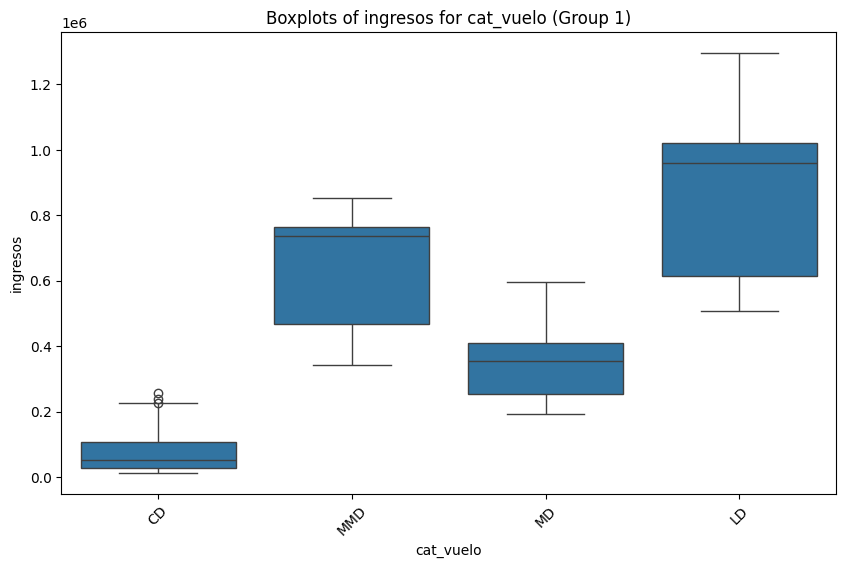

In [16]:
# Relacionamos mediante el diagrama de cajas
plot_grouped_boxplots(df_air_jun,"cat_vuelo","ingresos")

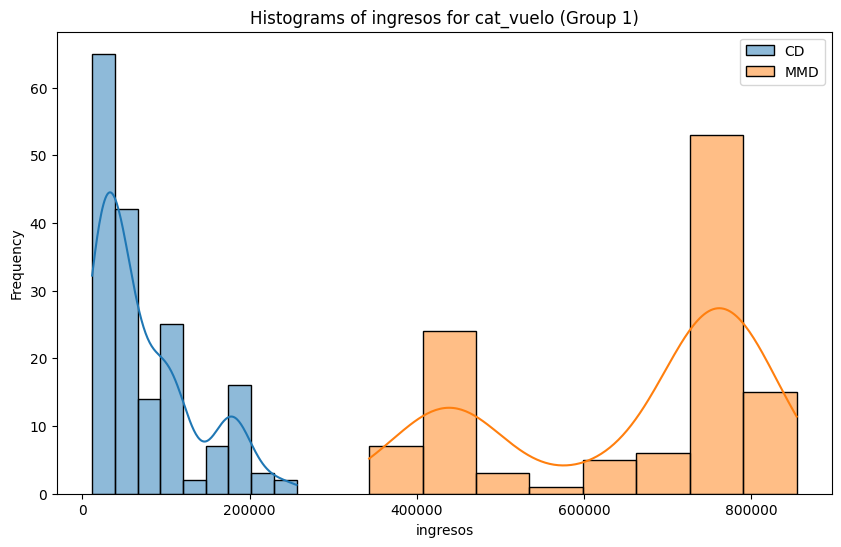

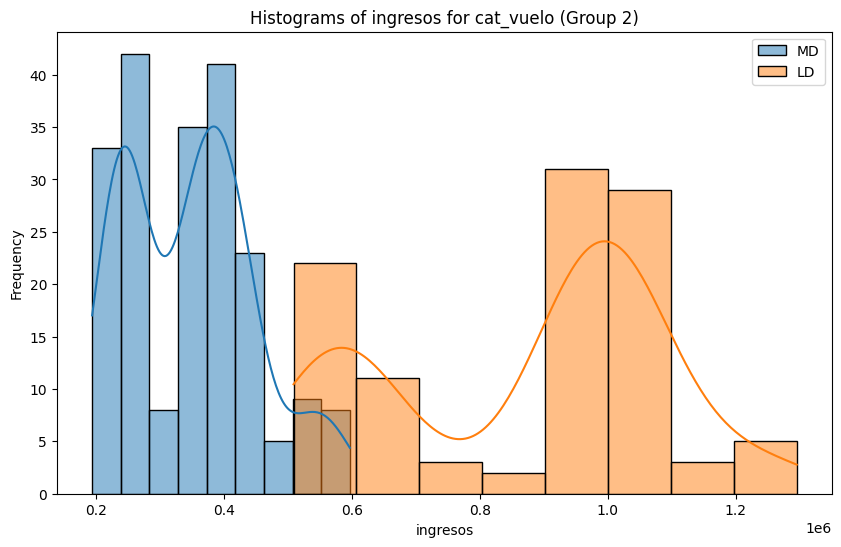

In [17]:
# Comparamos sus histogramas
plot_grouped_histograms(df_air_jun,"cat_vuelo", "ingresos", 2)

*Análisis*:
- Por norma general, los vuelos LG son los que ingresan más por lo que el vuelo que nombramos anteriormente que era el más eficiente en combustible, es más eficiente también en ingresos, ya que consumen menos y se obtiene más benedicios.

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.